<a href="https://colab.research.google.com/github/tirals88/Alone-ML-DL/blob/main/2%EC%9E%A5_2%EC%A0%88%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'혼자 공부하는 머신러닝 + 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/rickiepark/hg-mldl'

**혼자 공부하는 머신러닝+딥러닝**

https://hanbit.co.kr/store/books/look.php?p_code=B2002963743

01 ~ 06 머신러닝 파트  
07 ~ 09 딥러닝 파트

# 02-2 데이터 전처리


이전의 데이터 처리는 **파이썬 리스트**를 사용하였지만, **넘파이**로 더 빠르고 효율적으로 처리할 수 있다.



```
np.column_stack(list_lists)
np.column_stack(([1,2,3],[4,5,6]))

>>> array([[1, 4],
           [2, 5],
           [3, 6]])

np.concatenate(list_lists)
np.concatenate(([1,2,3],[4,5,6]))

>>> array([[1, 2, 3, 4, 5, 6])
```



In [1]:
# 01-3 의 데이터 준비
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip() 함수와 리스트 내포 구문을 사용해 2차원 리스트 생성

fish_data = [[l, w] for l, w in zip(length, weight)]

# 정답 데이터 준비
# 도미 = 1, 빙어 = 0 으로 설정

fish_target = [1] * 35 + [0] * 14

In [2]:
# numpy 로 전처리
import numpy as np

fish_data = np.column_stack((length, weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# np.ones
# np.zeros

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


이전 절에서는 훈련 세트와 테스트 세트를 직접 나누었다. 지금은 사이킷런의 함수 **train_test_split()**를 이용하여 나눌 것이다.

이 함수는 전달되는 리스트나 배열을 섞어준 뒤 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.



In [8]:
# train_test_split()
# 사이킷런의 model_selection 모듈 아래 있으며 다음과 같이 import 할 수 있다.

from sklearn.model_selection import train_test_split

# 사용법

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42)

fish_data 와 fish_target 2개의 배열을 전달했으므로, 2개씩 나뉘어 총 4개의 배열이 반환된다.

차례대로 처음 2개는 입력데이터(train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target)이다.

랜덤 시드는 42로 설정하였다.

또한 기본적으로 25%를 테스트 세트로 떼어 낸다.

In [11]:
# 잘 되었는지 numpy의 shape 속성을 통해 확인

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


위 데이터를 보면 잘 섞인 것 같지만 빙어의 비율이 조금 모자란다. 편향이 조금 있고 이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다.

특히 데이터의 개수가 적을 때 이런 일이 생기기 쉽다.

train_test_split() 함수는 이런 문제를 간단히 해결 할 수 있다. 

stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.

```
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state = 42)
```



In [14]:
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.
# 위에서 말했듯 데이터의 개수가 적을 때 특히 유용하다.

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state = 42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# k-최근접 이웃 훈련

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [20]:
# 25cm, 150g 의 도미 판별

print(kn.predict([[25, 150]]))

print(kn.score([[25, 150]], [1])) # score 함수와 predict 함수 차이

[0.]
0.0


도미의 feature가 25cm 와 150g 으로 주어지자 빙어라고 예측

문제점을 파악하기 위해 **산점도**로 표현

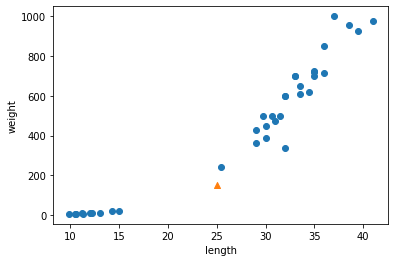

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 샘플은 분명히 다른 도미 데이터에 더 가깝다.

그렇다면 왜 빙어 데이터에 가깝다고 판단한 것일까?

k-최근접 이웃은 주변의 샘플 중 다수인 클래스를 예측으로 사용한다.

KNeighborsClassifer 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드를 제공한다.

KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5 이므로 5개의 이웃이 반환된다.

In [24]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)
train_target[indexes]

[[21 33 19 30  1]]


array([[1., 0., 0., 0., 0.]])

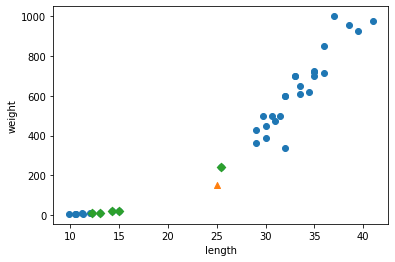

In [29]:
# 산점도로 확인
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가장 가까운 데이터 5개 중 4개가 빙어로 압도적으로 많음을 확인할 수 있다.

객관적으로 보았을 떄와 다르다.

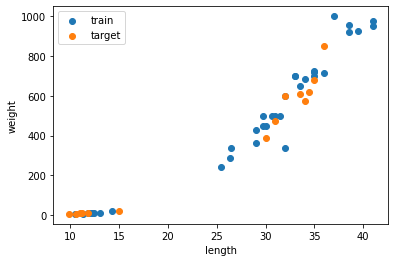

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label = 'train')
plt.scatter(test_input[:, 0], test_input[:, 1], label = 'target')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show() # 데이터가 골고루 섞였음을 볼 수 있다.

## 두 번쨰 머신러닝 프로그램


In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# _predict() 메서드로 테스트 세트 예측결과와 실제 타깃 확인

print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


### 고찰

predict() 메서드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸 있는 것을 확인할 수 있다. 넘파이 배열을 의미하며 predict()가 반환하는 값은 파이썬 리스트가 아닌, 넘파이 배열이다.

**이 절에서는 넘파이의 shuffle() 함수를 사용해 배열의 인덱스를 섞어 골고루 훈련과 테스트 세트로 나누어 학습을 하였다.**